# TIM AI Academy

## Demonstração 12 - A partir do dataset fictício, explanação a respeito de normalização de dados (data normalization).

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

Temos um conjunto de dados com as seguintes colunas:

customer_id: ID único do cliente.

call_duration: Duração das chamadas em minutos (de 1 a 300).

data_usage: Consumo de dados em GB (de 0.1 a 50).

monthly_bill: Fatura mensal do cliente em reais (de  R$ 50  a  R$ 1500).

calls_made: Número de chamadas feitas no mês.

In [ ]:
# Criando um DataFrame fictício de telecomunicações
data = {
    'customer_id': [1, 2, 3, 4, 5],
    'call_duration': [120, 180, 90, 250, 200],  # em minutos
    'data_usage': [5.0, 30.0, 10.5, 50.0, 25.0],  # em GB
    'monthly_bill': [100, 600, 200, 1200, 800],  # em R$
    'calls_made': [50, 100, 30, 150, 80]  # número de chamadas
}

df = pd.DataFrame(data)
print("Dados originais:")
print(df)

Dados originais:
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1            120         5.0           100          50
1            2            180        30.0           600         100
2            3             90        10.5           200          30
3            4            250        50.0          1200         150
4            5            200        25.0           800          80


Min-Max Scaling: Transforma os dados para que eles fiquem entre 0 e 1. Isso é útil para algoritmos como redes neurais, que são sensíveis à escala dos dados.

Standardization (Z-Score): Transformação dos dados para que eles tenham média 0 e desvio padrão 1. Ideal para algoritmos que assumem distribuição normal, como regressão linear e SVM.

Robust Scaling: Usa a mediana e o intervalo interquartil para reduzir o impacto de outliers. Isso é importante quando se trabalha com dados que possuem valores extremos (outliers), como pode ser o caso de faturas mensais muito altas ou baixos consumos de dados.

In [ ]:
# Normalização Min-Max
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']] = min_max_scaler.fit_transform(df[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']])

# Padronização (Z-Score)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']] = standard_scaler.fit_transform(df[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']])

# Normalização Robusta
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']] = robust_scaler.fit_transform(df[['call_duration', 'data_usage', 'monthly_bill', 'calls_made']])

Min-Max Scaling: A coluna monthly_bill pode ter valores entre 0 e 1, representando a proporção de cada valor em relação ao intervalo máximo.

Padronização (Z-Score): As colunas terão média 0 e desvio padrão 1. Os valores em torno de 0 representam a média, e valores positivos ou negativos indicam desvio em relação à média.

Normalização Robusta: A coluna monthly_bill pode ser reduzida ou ampliada dependendo da presença de outliers, mas a mediana e o IQR serão preservados, tornando o modelo mais resistente a dados extremos.

In [ ]:
# Exibindo os resultados
print("\nNormalização Min-Max:")
print(df_min_max)

print("\nPadronização (Z-Score):")
print(df_standard)

print("\nNormalização Robusta:")
print(df_robust)


Normalização Min-Max:
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1         0.1875    0.000000      0.000000    0.166667
1            2         0.5625    0.555556      0.454545    0.583333
2            3         0.0000    0.122222      0.090909    0.000000
3            4         1.0000    1.000000      1.000000    1.000000
4            5         0.6875    0.444444      0.636364    0.416667

Padronização (Z-Score):
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1      -0.841200   -1.205005     -1.194045   -0.768025
1            2       0.210300    0.372227      0.049752    0.432014
2            3      -1.366949   -0.858014     -0.945285   -1.248040
3            4       1.437049    1.634012      1.542308    1.632052
4            5       0.560800    0.056780      0.547270   -0.048002

Normalização Robusta:
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1         -0.750   -1.025641    

In [ ]:
# Convertendo para DataFrame para visualização
df_min_max = pd.DataFrame(df_min_max, columns=df.columns)
df_standard = pd.DataFrame(df_standard, columns=df.columns)
df_robust = pd.DataFrame(df_robust, columns=df.columns)

# Exibindo os resultados
print("Original Data:")
print(df)
print("\nMin-Max Normalization:")
print(df_min_max)
print("\nStandardization (Z-Score):")
print(df_standard)
print("\nRobust Scaling:")
print(df_robust)

Original Data:
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1            120         5.0           100          50
1            2            180        30.0           600         100
2            3             90        10.5           200          30
3            4            250        50.0          1200         150
4            5            200        25.0           800          80

Min-Max Normalization:
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1         0.1875    0.000000      0.000000    0.166667
1            2         0.5625    0.555556      0.454545    0.583333
2            3         0.0000    0.122222      0.090909    0.000000
3            4         1.0000    1.000000      1.000000    1.000000
4            5         0.6875    0.444444      0.636364    0.416667

Standardization (Z-Score):
   customer_id  call_duration  data_usage  monthly_bill  calls_made
0            1      -0.841200   -1.205005     -1.

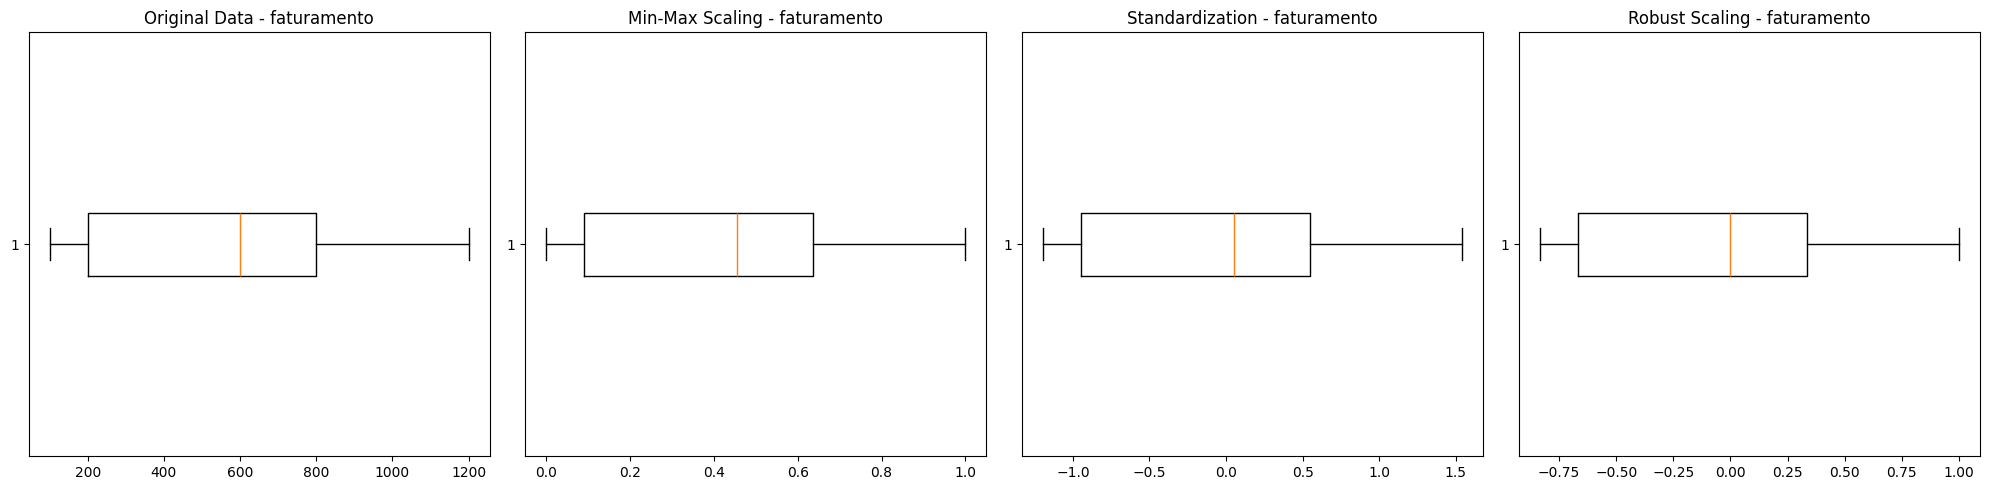

In [ ]:
# Plotando os resultados para visualização
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Gráficos para comparação
axes[0].boxplot(df['monthly_bill'], vert=False)
axes[0].set_title('Original Data - faturamento')

axes[1].boxplot(df_min_max['monthly_bill'], vert=False)
axes[1].set_title('Min-Max Scaling - faturamento')

axes[2].boxplot(df_standard['monthly_bill'], vert=False)
axes[2].set_title('Standardization - faturamento')

axes[3].boxplot(df_robust['monthly_bill'], vert=False)
axes[3].set_title('Robust Scaling - faturamento')

plt.tight_layout()
plt.show()

Este exemplo mostra como atributos no mundo das telecomunicações, como duração de chamadas, uso de dados, fatura mensal e número de chamadas feitas, podem ser normalizados para otimizar a performance de modelos de aprendizado de máquina, dependendo das características do conjunto de dados (como a presença de outliers).